첫 번째 시간
- 실습

### 목표
- 학생들의 수학 성적을 예측하는 회귀 모델을 만들어보자!
- keras를 이용해 신경망을 구성하는 방법을 익혀보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
/content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정/data/student-mat.csv

In [ ]:
# print working directory ; linux
%pwd

'/content'

In [ ]:
# change directory : 작업 경로 변경
%cd /content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정

/content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정'

In [ ]:
data = pd.read_csv("data/student-mat.csv", delimiter=";")

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


- 문제, 정답 분리

In [ ]:
#  문제는 studytime, 정답은 G3
X = data['studytime']
y = data['G3']

In [ ]:
X.shape, y.shape

((395,), (395,))

- 학습, 평가 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

355    2
311    2
15     1
266    2
200    2
      ..
146    2
66     4
216    2
391    1
20     2
Name: studytime, Length: 296, dtype: int64
358    1
317    3
155    2
242    1
89     2
      ..
388    2
81     3
350    2
110    1
95     4
Name: studytime, Length: 99, dtype: int64
355     9
311    13
15     14
266    10
200    16
       ..
146     0
66     12
216     4
391    16
20     15
Name: G3, Length: 296, dtype: int64
358    10
317     9
155     8
242     0
89      7
       ..
388     8
81     11
350     8
110    19
95     10
Name: G3, Length: 99, dtype: int64


### 신경망 모델 만들기
- 1. 신경망 구조 설계
- 2. 신경망 학습 및 평가 방법 설정
- 3. 학습 및 학습과정 시각화
- 4. 모델 평가

In [ ]:
# 1. 신경망 구조설계
# Sequential : 신경망의 뼈대를 구축하기 위한 함수
from tensorflow.keras import Sequential
# InputLayer : 신경망의 입력층을 생성
# Dense : 신경망 층(뉴런의 묶음)을 구성해주는 함수
from tensorflow.keras.layers import InputLayer, Dense

In [ ]:
# 1. 신경망 구조 설계
# 신경망 뼈대 설정
model = Sequential()

# 입력층 설정
# input_shape : 입력 데이터의 특성 형태를 설정(1개의 특성을 가진 1차원 데이터)
model.add(InputLayer(input_shape=(1,)))

# 출력층 설정
# Dense : 하나의 층을 쌓아주는 함수 (괄호 안의 숫자는 해당 층에 있는 뉴런의 개수)
model.add(Dense(1))

# 설계된 신경망의 정보를 요약해서 출력
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. 신경망 학습 및 평가방법 설정
#손실함수(비용함수), 최적화함수 설정
  # 딥러닝은 학습이 머신러닝처럼 한번에 끝나지 않는다.
  #
model.compile(loss='mse',
              optimizer = 'SGD'
              )

In [ ]:
# 3. 학습 및 시각화
h = model.fit(X_train, y_train,
              epochs = 100     # 학습 횟수 설정
              )

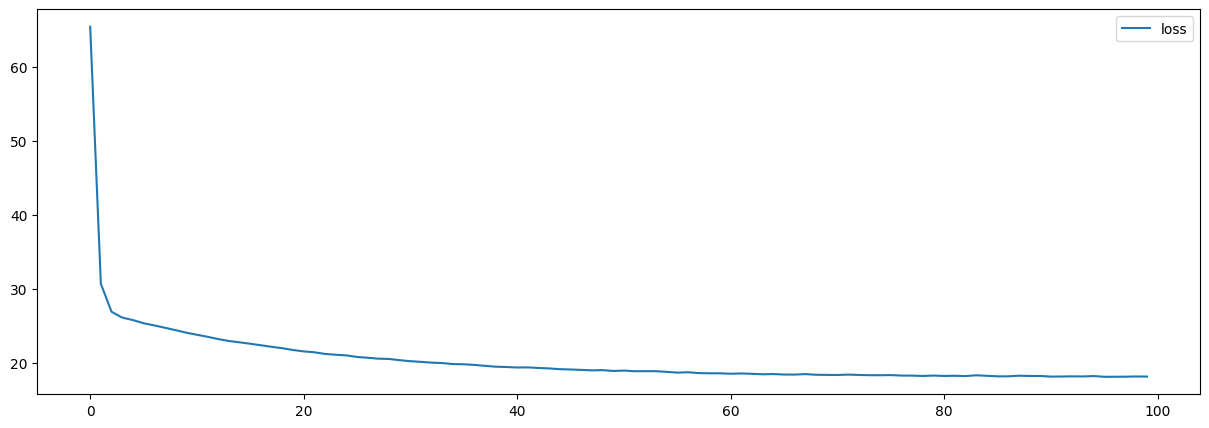

In [ ]:
# 3. 학습과정 시각화
plt.figure(figsize=(15,5))

# history : 학습시 출력되는 값(loss, acc)들을 가져올 수 있게 해주는 명령
plt.plot(h.history['loss'], label='loss')

plt.legend()
plt.show()

- 초반에는 빠르게 loss(mse)이 떨어지고 있음
- 경사하강법 초반에는 가중치(w), 절편(b)값이 임의의 값으로 설정되어 있기 때문에 몇 번만 학습시켜도 mse가 빠르게 줄어드는 것을 볼 수 있음

In [ ]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 28.9496


28.949630737304688

### 입력 특성이 2개인 모델을 직접 만들어보자
- 문제 (studytime, traveltime) - X1
- 정답(G3) - y1
- 신경망의 최종 출력층 뉴런 개수는 1개

In [ ]:
# 직접 1~4단계를 진행해보세요~!

In [ ]:
#  문제는 studytime, 정답은 G3
X1 = data[["studytime","traveltime"]]
y1 = data['G3']

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=33)

In [ ]:
# 1. 신경망 구조 설계
# 신경망 뼈대 설정
model1 = Sequential()

# 입력층 설정
# input_shape : 입력 데이터의 특성 형태를 설정(1개의 특성을 가진 1차원 데이터)
model1.add(InputLayer(input_shape=(2,)))

# 출력층 설정
# Dense : 하나의 층을 쌓아주는 함수 (괄호 안의 숫자는 해당 층에 있는 뉴런의 개수)
model1.add(Dense(1))

# 설계된 신경망의 정보를 요약해서 출력
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. 신경망 학습 및 평가방법 설정
#손실함수(비용함수), 최적화함수 설정
  # 딥러닝은 학습이 머신러닝처럼 한번에 끝나지 않는다.
  #
model1.compile(loss='mse',
              optimizer = 'SGD'
              )

In [ ]:
# 3. 학습 및 시각화
h = model1.fit(X1_train, y1_train,
              epochs=100  # 학습 횟수 설정
              )

Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 61.2430
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 27.7057
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 24.9816
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 24.6061
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 24.3985
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 24.1579
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 23.9387
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 23.7224
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 23.7974
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 23.4903
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 23.2507
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 23.1184
Epoch 13/100
10/10 [=====

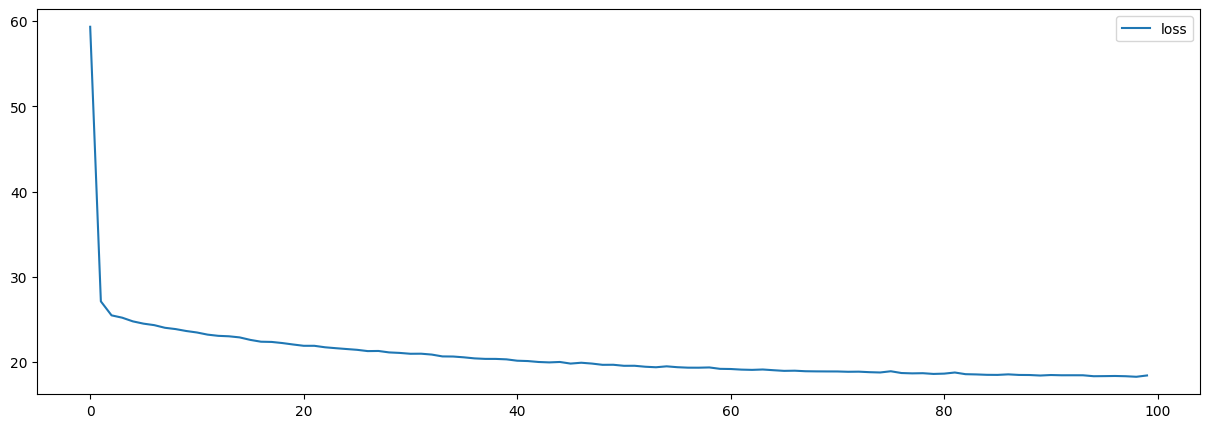

In [ ]:
# 3. 학습과정 시각화
plt.figure(figsize=(15,5))

# history : 학습시 출력되는 값(loss, acc)들을 가져올 수 있게 해주는 명령
plt.plot(h.history['loss'], label='loss')

plt.legend()
plt.show()